<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/CV2_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 07/26/2021-2
from __future__ import absolute_import
from IPython.display import clear_output

import glob, os, shutil
from os.path import *

try: 
    from google.colab import drive, files
    from google.colab.patches import cv2_imshow
except Exception as err:
    pass

try: 
    from matplotlib import pyplot as plt
except Exception as err:
    %pip install matplotlib
    from matplotlib import pyplot as plt

try: 
    import cv2
    from cv2 import COLOR_BGR2RGBA
except Exception as err:
    print(err)
    %pip install opencv-python-headless # works.
    # %pip install opencv-contrib-python-headless
    import cv2
    from cv2 import COLOR_BGR2RGBA, IMREAD_UNCHANGED

import numpy as np

if exists('/content/sample_data'):
    shutil.rmtree('/content/sample_data')

contentPth = os.getcwd()
tensorflowImagesPath = join(contentPth, 'TensorflowImages')
resizedImagesPath = join(contentPth, 'TensorflowResizedImages')

if exists(resizedImagesPath):
    pass
    shutil.rmtree(resizedImagesPath)

try:
    drive.flush_and_unmount()
    drive.mount('/content/gdrive/', force_remount=True)
    mydrivePth = '/content/gdrive/MyDrive'
    os.chdir(mydrivePth)
    gdriveTFImagesPth = join(mydrivePth, 'TensorflowImages')
    gdriveResizedImagesPth = join(mydrivePth, 'TensorflowResizedImages')
    
    os.chdir(mydrivePth)
    from TarfileFunctions import *
    from BashColors import C
    
    if not exists(tensorflowImagesPath):
        shutil.copytree(gdriveResizedImagesPth, tensorflowImagesPath)
        # tff.listTarfiles()
        os.chdir(contentPth)
        # tff.extractTarfiles('Juno_Original_Images.tar.gz')

    gdrive_resized_images = '/content/gdrive/MyDrive/TensorflowResizedImages'
    if not exists(resizedImagesPath): # and not exists(resizedImagesPath):
        # print('from:', gdrive_resized_images)
        # print('to:', resizedImagesPath)
        try: shutil.copytree(gdrive_resized_images, resizedImagesPath)
        except Exception as err:
            print(err)

    os.chdir(contentPth)

except Exception as err:
    # print(err)
    os.chdir(contentPth)
    from TarfileFunctions import *
    from BashColors import C
    tarfilePath=join(contentPth, 'Juno_Original_Images.tar.gz')
    if exists(tarfilePath) and not exists(tensorflowImagesPath):
        tff.extractTarfiles('Juno_Original_Images.tar.gz')

rootPth = expanduser("~")

os.chdir(contentPth)
print(f'cv2: {C.IBlue}{cv2.__version__}{C.ColorOff}')
print(f'cwd: {C.IBlue}{os.getcwd()}')

Mounted at /content/gdrive/
cv2: 4.1.2
cwd: /content


In [2]:
os.chdir(tensorflowImagesPath)
imageGlob = glob.glob('**', recursive=True)
pathList=[]
count=0
for path in sorted(imageGlob):
    fullPath = abspath(path)
    if isfile(path):
        pathList.append(fullPath)
        print(count, fullPath)
        count+=1
clear_output()

In [3]:
def matPlotCompareTwoImages(thisImage, compareImage=None):
    if compareImage == 'None':
        compareImage = np.copy(thisImage)
    


def cv2ResizeImage(thisImage):
    pass

def cv2CreateImageWithColor(pxColor, silent=True):
    bgImagePath = join(contentPth, 'TensorflowImages/backgroundImage224.png')
    save_path = join(contentPth, 'bgImage.png')
    print(save_path)
    bgImage = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
    cv2.imwrite(save_path, bgImage)
    for px in bgImage:
        bgImage[:] = pxColor
        cv2.waitKey(500)
        cv2.destroyAllWindows()
    if not silent:
        print(f'shape: {bgImage.shape}')
        cv2_imshow(bgImage)
    return save_path

def cv2ZoomOutImage(imagePath):
    img = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)

bgImagePath=cv2CreateImageWithColor(pxColor=[0, 0, 255, 255])


/content/bgImage.png


/content/bgImage.png
shape: (224, 224, 4)


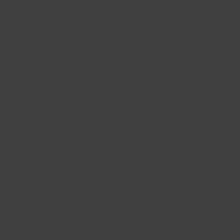

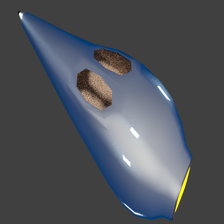

In [4]:
bgImage= cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
imagePath = pathList[0]
enemyImage = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
zeroPixel = enemyImage[0][0]
bgImagePath = cv2CreateImageWithColor(pxColor=zeroPixel,silent=False)
cv2_imshow(enemyImage)
